In [3]:
# config all inputs
input_file = "raw/Natural Gas - Reduced.csv";
key="Total Domestic Production"
output_file = "output/forecasted_gas_demand_sarima.csv";
train_date_to = '2022-12-31'
test_date_from = '2023-01-01';

c:\Users\User\nook-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\nook-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\nook-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\User\nook-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_inde

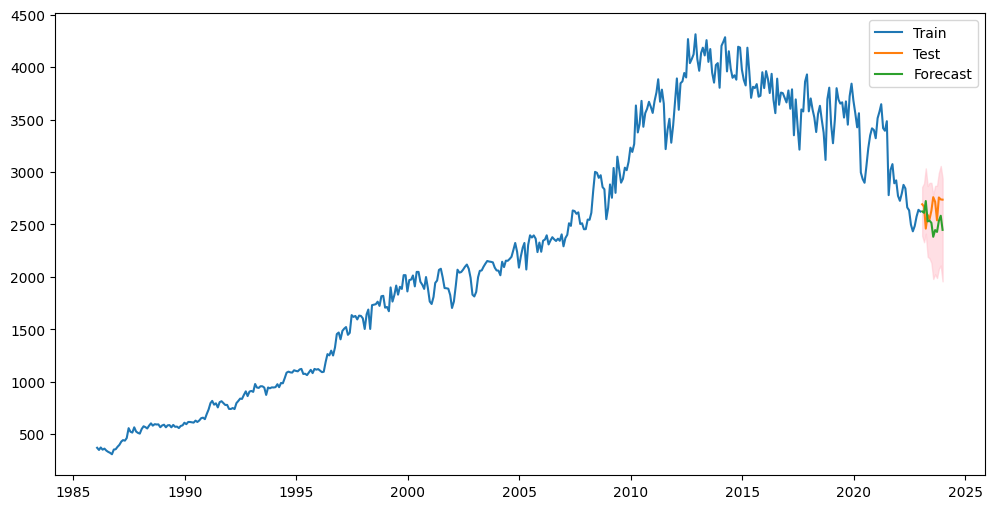

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# โหลดข้อมูล (ควรเปลี่ยนเส้นทางไฟล์ให้ถูกต้อง)
data = pd.read_csv(input_file, parse_dates=['Date'], index_col='Date')

# แยกข้อมูลออกเป็น train และ test sets
train = data[:train_date_to]
test = data[test_date_from:]

# สร้างโมเดล SARIMA
model = SARIMAX(train[key], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model = model.fit(disp=False)

# พยากรณ์ค่าในอนาคต
forecast = sarima_model.get_forecast(steps=len(test))
predicted = forecast.predicted_mean
conf_int = forecast.conf_int()

# วาดกราฟเปรียบเทียบ
plt.figure(figsize=(12, 6))
plt.plot(train.index, train[key], label='Train')
plt.plot(test.index, test[key], label='Test')
plt.plot(test.index, predicted, label='Forecast')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.5)
plt.legend()
plt.show()

# สร้าง DataFrame สำหรับผลการพยากรณ์
forecast_df = pd.DataFrame({
    'date': test.index,
    'actual': test[key],
    'forecast': predicted.values.astype(int),
    'lower_conf_int': conf_int.iloc[:, 0].values.astype(int),
    'upper_conf_int': conf_int.iloc[:, 1].values.astype(int)
})

# ตั้งค่า index ของ DataFrame เป็น date
forecast_df.set_index('date', inplace=True)

# ส่งออกผลลัพธ์ไปยังไฟล์ .csv
forecast_df.to_csv(output_file)